# Simple Autoencoder

### Reconstruct scattered squares in 2D

In [1]:
import numpy as np
import matplotlib.pyplot as plt

from network import Network

### Generate data

In [2]:
# Generate square with random position and side length

size = 100

# core features (3)
bottom_left = np.random.normal(0,3,size=(size,2)) # x,y
radius = np.abs(np.random.normal(size=size)) + 1 # lengh of side

# redundant features (8)
X = np.zeros((size,8)) # xy of the four corners
# bottom left
X[:,0] = bottom_left[:,0]
X[:,1] = bottom_left[:,1]
# bottom right
X[:,2] = bottom_left[:,0] + radius[:]
X[:,3] = bottom_left[:,1]
# top left
X[:,6] = bottom_left[:,0]
X[:,7] = bottom_left[:,1] + radius[:]
# top right
X[:,4] = bottom_left[:,0] + radius[:]
X[:,5] = bottom_left[:,1] + radius[:]

### Original squares

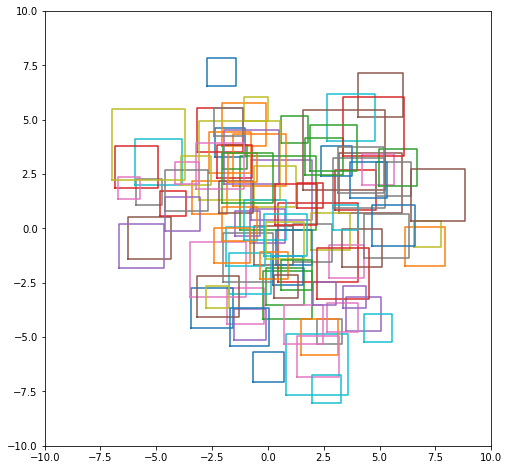

In [22]:
plt.figure(figsize=(8,8))
for i in range(len(X)):
    plt.plot(np.append(X[i,::2],X[i,0]),np.append(X[i,1::2],X[i,1]))
plt.ylim(-10,10)
plt.xlim(-10,10)
plt.show()

### Fitting

In [24]:
# autoencoder architecture - n decreasing then increasing back to the original number
network = Network(8,6,3,6,8,output_type='regression')

In [25]:
network.train(X,X,100,learning_rate=0.001)

In [26]:
# score
y = network.predict(X)
# MSE
((X-y)**2).mean()

0.0915768044788237

In [29]:
# mine the latent features from the network (manually atm)
encoded_values = []
for i in range(size):
    network.predict(X[i:i+1])
    encoded_values.append(network.network[2].a)
encoded_values = np.array(encoded_values)    

In [30]:
# a sample
encoded_values[:5]

array([[10.2424448 ,  0.93721152,  6.09790835],
       [ 3.87005267,  0.59752558,  5.18325649],
       [ 0.72635731,  3.00212636,  2.99108466],
       [ 4.09294335,  2.43880139,  0.45942955],
       [ 2.87718256,  0.1229353 ,  1.90033605]])

### Interpret latent features

In [31]:
# try to generate one square 'from scratch'
generated = network.network[2].feed_forward([0,0,0])

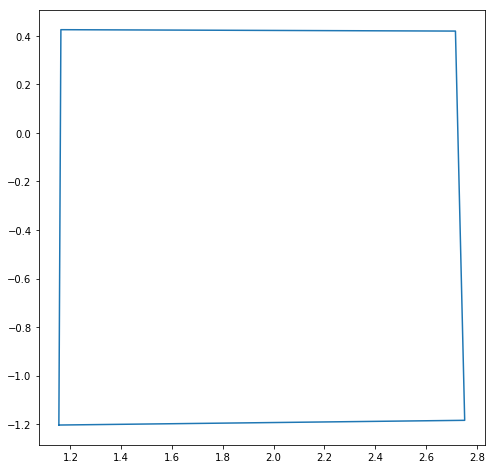

In [35]:
plt.figure(figsize=(8,8))
plt.plot(np.append(generated[::2],generated[0]),np.append(generated[1::2],generated[1]))
plt.show()

Not bad, looks like a proper square

**Now generate many squares**

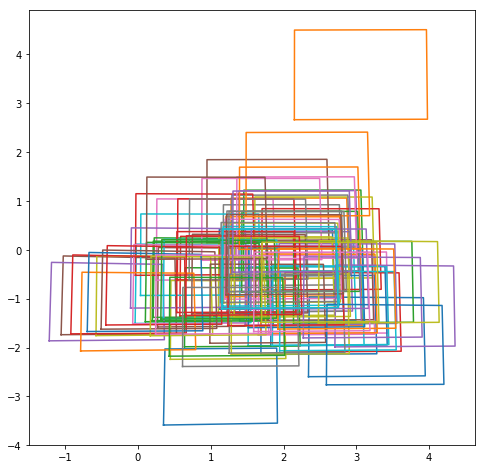

In [38]:
generated = []
for i in range(100):
    generated.append(network.network[2].feed_forward(np.random.normal(size=3)))
generated = np.array(generated)

plt.figure(figsize=(8,8))
for i in range(len(generated)):
    plt.plot(np.append(generated[i,::2],generated[i,0]),np.append(generated[i,1::2],generated[i,1]))
plt.show()

**Overall, they are all fairly square-shaped**

**Try to see if any one latent feature mostly controls the side-length**

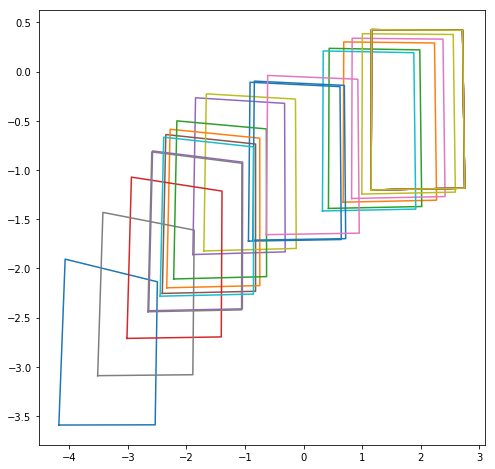

In [39]:
generated = []
for i in range(30):
    generated.append(network.network[2].feed_forward([0,0,np.random.normal(scale=3)]))
generated = np.array(generated)

plt.figure(figsize=(8,8))
for i in range(len(generated)):
    plt.plot(np.append(generated[i,::2],generated[i,0]),np.append(generated[i,1::2],generated[i,1]))
plt.show()

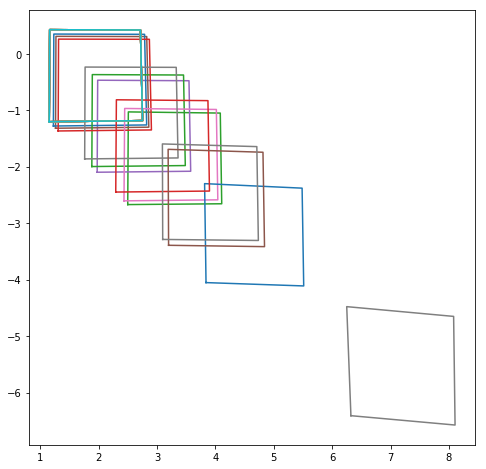

In [40]:
generated = []
for i in range(30):
    generated.append(network.network[2].feed_forward([0,np.random.normal(scale=3),0]))
generated = np.array(generated)

plt.figure(figsize=(8,8))
for i in range(len(generated)):
    plt.plot(np.append(generated[i,::2],generated[i,0]),np.append(generated[i,1::2],generated[i,1]))
plt.show()

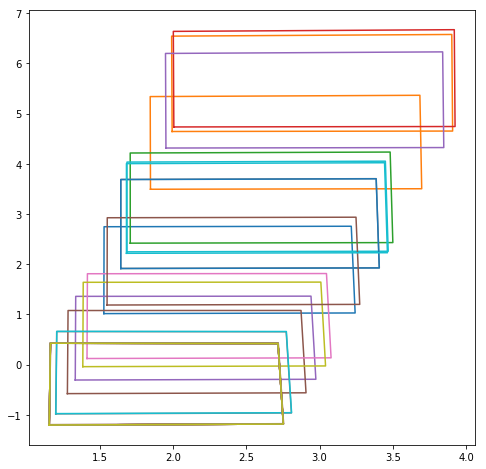

In [41]:
generated = []
for i in range(30):
    generated.append(network.network[2].feed_forward([np.random.normal(scale=3),0,0]))
generated = np.array(generated)

plt.figure(figsize=(8,8))
for i in range(len(generated)):
    plt.plot(np.append(generated[i,::2],generated[i,0]),np.append(generated[i,1::2],generated[i,1]))
plt.show()

### Conclusion

**It appears that the size is encoded in two separate features, one for x and one for y; these encoded features affect the length *and* the position in a coupled way**